In [3]:
"""
Load two patterns w/ PXRD

Obtain these patterns from both simulates, and call XRD.calculate_symmetry() w/ the patterns
as arguments.
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy
from XRD import Element, crystal, XRD

#_struct1 = crystal('POSCAR',filename='POSCAR-SrF')
_struct1 = crystal('cif',filename='NaCl.cif')
_wavelength = 1.54056
_max_diff_angle = 90
_po = False
_G = 0

# _struct2 = crystal('POSCAR',filename='POSCAR-SrF')
_struct2 = crystal('cif',filename='NaCl.cif')

xrd1 = XRD(_struct1,_wavelength,_max_diff_angle,_po,_G)
sim2thetas1 = xrd1.theta2
simpeaks1 = xrd1.xrd_intensity

xrd2 = XRD(_struct2,_wavelength,_max_diff_angle,_po,_G)
sim2thetas2 = xrd2.theta2
simpeaks2 = xrd2.xrd_intensity



0.46852113114643307


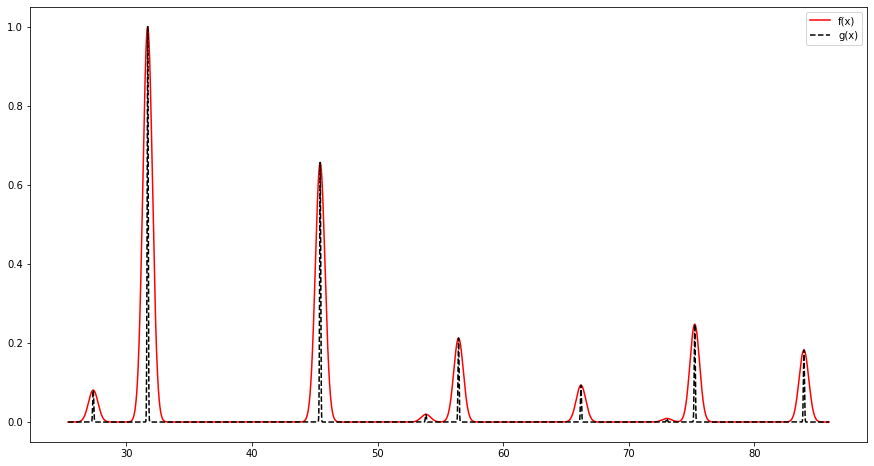

In [4]:
"""
XRD.get_profile(Num of points in profile, profile function, fwhm) function will return the profiling function (g2thetas and gpeaks) of the simulated patterns. 
"""

# get xrd profiling
fwhm1 = 0.9
fwhm2 = 0.1

xrd1.get_profile(sim2thetas1,simpeaks1,100000,'gaussian',fwhm1)
xrd2.get_profile(sim2thetas2,simpeaks2,100000,'gaussian',fwhm2)
f2thetas = xrd1.g2thetas
fpeaks = xrd1.gpeaks
g2thetas = xrd2.g2thetas
gpeaks = xrd2.gpeaks

"""
Similarity().calculate() takes the profiled intensities to compare (fpeaks, gpeaks, triangle function weight)
"""

from similarity import Similarity
S = Similarity(fpeaks, gpeaks, 0.6).calculate()
print(S)

plt.figure(figsize=(15,8))
plt.plot(f2thetas,fpeaks, 'r-',label = 'f(x)')
plt.plot(g2thetas,gpeaks, 'k--',label = 'g(x)')
plt.legend()
plt.show()